In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import configparser
from perceptron import Perceptron

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    # import pdb; pdb.set_trace()
    Z = classifier.predict(
        np.array(
            [xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(idx),
            marker=markers[idx],
            label=cl)

In [4]:
inifile = configparser.ConfigParser()

In [5]:
inifile.read('../config.ini')

['../config.ini']

In [6]:
df = pd.read_csv(
    inifile.get('perceptron', 'iris_dataset_url'), header=None)

In [7]:
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [8]:
y = df.iloc[0:100, 4].values

In [9]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
X = df.iloc[0:100, [0, 2]].values

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [12]:
ppn.fit(X, y)

In [13]:
plot_decision_regions(X, y, classifier=ppn)

In [14]:
plt.xlabel('sepal length [cm]')

Text(0.5,0,'sepal length [cm]')

In [15]:
plt.ylabel('petal length [cm]')

Text(0,0.5,'petal length [cm]')

In [16]:
plt.legend(loc='upper left')

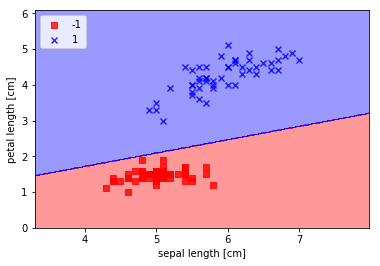

In [17]:
plt.show()